# Creando nuestras primeras neuronas

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Elegimos una semilla para números aleatorios
np.random.seed(123)
tf.set_random_seed(123)

Creamos un par de variables aleatorias: `random_a` y `random_b`.

In [3]:
random_a = np.random.uniform(0, 20, (4, 4))
random_a

array([[ 13.92938371,   5.7227867 ,   4.53702907,  11.02629538],
       [ 14.3893794 ,   8.4621292 ,  19.61528397,  13.69659477],
       [  9.61863803,   7.84235036,   6.86356032,  14.58099415],
       [  8.77144489,   1.19355793,   7.96088511,  14.75990811]])

In [4]:
random_b = np.random.uniform(0, 20, (4, 1))
random_b

array([[  3.64983461],
       [  3.50903512],
       [ 10.63102748],
       [ 10.63655174]])

Creamos los `placeholders` correspondientes como `float32`

In [5]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

Definimos dos operaciones: una de suma y otra de multiplicación.

In [6]:
#tf.add(a,b)
sum_operator = a + b

#tf.multiply(a,b)
mult_operator = a * b 

Ejecutando una sesión, es posible obtener el resultado de las dos operaciones arriba indicadas.

In [7]:
with tf.Session() as sess:
    add_result = sess.run(sum_operator, feed_dict = {a: random_a, b: random_b})
    print(add_result)
    
    print('\n')
    
    mult_result = sess.run(mult_operator, feed_dict = {a: random_a, b: random_b})
    print(mult_result)

[[ 17.57921791   9.37262154   8.1868639   14.67613029]
 [ 17.89841461  11.9711647   23.12431908  17.20563126]
 [ 20.24966431  18.47337723  17.49458694  25.21202087]
 [ 19.40799713  11.8301096   18.5974369   25.39645958]]


[[  50.83994675   20.8872261    16.55940628   40.24415588]
 [  50.492836     29.6939106    68.83071899   48.06183243]
 [ 102.25600433   83.37223816   72.96669769  155.01095581]
 [  93.29793549   12.69534111   84.67636871  156.99452209]]


##  Ejemplo de Red Neuronal

In [8]:
# Definimos el número de variables y el número de neuronas que tendrá nuestra primera capa
n_features = 10
n_dense_neurons = 5

In [9]:
# Placeholder para una variable x de dimensión [?, n_features]
x = tf.placeholder(tf.float32, (None, n_features), name = 'x')

In [10]:
# Definimos las matrices correspondientes a los bias y los pesos W
b = tf.Variable(tf.zeros([n_dense_neurons]), name = 'bias')

W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]), name = 'W')

## Definición de la función de activación

In [11]:
# Definimos el producto de las dos matrices x y W
W_x = tf.matmul(x, W)

In [12]:
# La salida de la capa de neuronas z = W·x + b
z = tf.add(W_x, b)

Desde un terminal seremos capaces de lanzar TensorBoard. Las instrucciones quedan indicadas después de este notebook.

In [13]:
# tf.nn.relu() or tf.tanh()
activation = tf.sigmoid(z)

In [14]:
init = tf.global_variables_initializer()

Puede resultar interesante acceder a la funcionalidad de visualización de grafos soportada por TensorFlow. Para ello, debemos generar un summary data del que pueda generarse el resumen del grafo en TensorBoard dentro de la ejecución de la propia sesión.

In [15]:
with tf.Session() as sess:
    sess.run(init)
    # Para obtener la salida a nuestra capa de 5 neuronas, indicamos la función de activación (operación)
    # y le pasamos como variabl un array aletaorio de dimensión [1, n_features]
    layer_out = sess.run(activation, feed_dict={x : np.random.random([1, n_features])})
    
    # sess.graph contiene la definición del grafo. Con esto habilitaremos el Graph Visualizer en tensorboard.
    
    file_writer = tf.summary.FileWriter("log/neural_network_tensorflow/", sess.graph)

In [16]:
print(layer_out)

[[ 0.71805179  0.83095247  0.54439819  0.9794479   0.35519969]]


# Ejemplo de Regresión Lineal con TensorFlow

In [17]:
# Fabricaremos algunas variables independientes aleatorias:
x_data = np.linspace(0,50,50) + np.random.uniform(-0.5,0.5,50)

In [18]:
y_label = np.linspace(0,10,50) + np.random.uniform(-1.5,1.5,50)

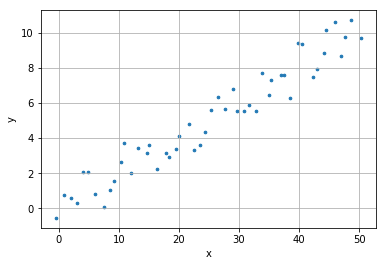

In [19]:
plt.scatter(x_data, y_label, s = 7)
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [20]:
# Inicializamos con valores aleatorios como variables la pendiente y la intersección 
# de nuestra recta a ajustar a los datos.
misc = np.random.rand(2)

m = tf.Variable(misc[0], dtype = tf.float32)
b = tf.Variable(misc[1], dtype = tf.float32)

## Definición de una función de coste

In [21]:
# Definimos al inicio un error nulo
error = 0
for x, y in zip(x_data, y_label):
    # Nuestro valor predicho
    y_pred = m * x + b
    # Definimos la función de coste. en este caso hacemos uso de la típica RMS.
    # ¡Necesitaremos una función de optimización para la minimización!

    error += (y - y_pred)**2

In [22]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
# Elegir learning rates muy elevadas puede provocar que la solución posterior diverja.
# Buscamos minimizar el optimizador anterior.
train = optimizer.minimize(error)

In [23]:
init = tf.global_variables_initializer()

In [24]:
with tf.Session() as sess:

    sess.run(init)
    # Elegimos un número de epochs en el que entrenar nuestra red
    epochs = 100
    for i in range(epochs):
        sess.run(train)
        
    # Los resultados de la pendiente y el punto de intersección se pueden obtener fácilmente
    final_m , final_b = sess.run([m, b])
    
    file_writer = tf.summary.FileWriter("log/neural_network_tensorflow/", sess.graph)

In [25]:
print(final_m, final_b)

0.197661 0.140447


## Evaluación del ajuste

In [26]:
# Elegimos un conjunto de variables independientes de prueba y obtenemos su predicción 
x_test = np.linspace(0, 50, 50)
y_test = final_m * x_test + final_b

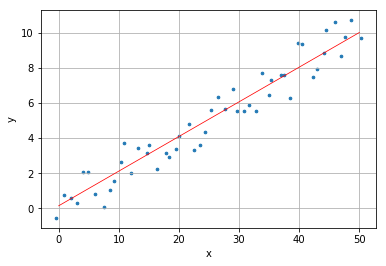

In [27]:
plt.scatter(x_data,y_label, s = 7)
plt.plot(x_test, y_test, 'r', linewidth = .75)
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [28]:
# Suma de los cuadrados de los residuos:
SS_res = np.sum((y_label - (final_m * x_data + final_b))**2)
# La suma de los cuadrados totales se define como:
SS_tot = np.sum((y_label - np.mean(y_label))**2)

# El coeficiente r**2 se define como:
r_squared = 1 - SS_res/SS_tot

In [29]:
r_squared

0.92950159578413183